A notebook for processing calibration data for the cameras of the OROCHI Simualtor of the Kameda Lab.

In [ ]:
from fxpmath import Fxp
x = Fxp(-7.25, signed=True, n_word=16, n_frac=8)
# playing with fixed point precision:
t_min = 1.0/16384 # initial, good exposure
t_scale = 1.123 # artbirary scaling factor

t_exp = t_min
for i in range(10):
    print(t_exp)
    t_exp = t_exp * t_scale
    t_fxp = Fxp(t_exp, signed=True, n_word=16, n_frac=16)
    print(t_fxp)



# Process Overview

The objective of this notebook is to process uniformly illuminated and dark images (across the sampling area) and characterise each camera of the OROCHI simulator, in terms of:
- Linearity
- Read Noise
- Gain
- FPN
- Dark Signal

To do this, we will process images of the 99% Reflectance Spectralon Calibration Target (SCT99) and the 5% Reflectance Spectral Calibration Target (SCT5), and images without illumination, at exposures that range from the minimum possible with the cameras (~5 µs) up to a maximum, defined such that all pixels of the image are saturated (DN=255).

For each of the SCT99 and SCT5 targets, we:
- for each channel:
    - load the list of exposures
    - for each exposure,
        - load image 1
        - load image 2
        - load the dark frame
        - get mean of image 1 - dark
        - get the noise of image 1 - dark
        - get the noise of image 1 - image 2
    - plot mean vs exposure
    - plot noise vs mean
    - plot ∆noise vs mean
    - get the read noise
    - get shot noise
    - plot shot noise vs mean
    - get sensitivity
    - plot sensitivity vs mean
    - evaluate linearity

As we'd like to repeat this for each camera, we will write each of these steps into functions, contained in the notebook here, such that the analysis can be iterated and automated.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Channel 1 Tests

Here we develop the analysis functions for the first camera only.


Loaded images (650_10061us_1_calibration) for: 0 (650 nm)
Loaded images (650_10061us_2_calibration) for: 0 (650 nm)
Loaded images (650_10061us_d_drk) for: 0 (650 nm)
Loaded images (650_105us_1_calibration) for: 0 (650 nm)
Loaded images (650_105us_2_calibration) for: 0 (650 nm)
Loaded images (650_105us_d_drk) for: 0 (650 nm)
Loaded images (650_1128us_1_calibration) for: 0 (650 nm)
Loaded images (650_1128us_2_calibration) for: 0 (650 nm)
Loaded images (650_1128us_d_drk) for: 0 (650 nm)
Loaded images (650_12074us_1_calibration) for: 0 (650 nm)
Loaded images (650_12074us_2_calibration) for: 0 (650 nm)
Loaded images (650_12074us_d_drk) for: 0 (650 nm)
Loaded images (650_127us_1_calibration) for: 0 (650 nm)
Loaded images (650_127us_2_calibration) for: 0 (650 nm)
Loaded images (650_127us_d_drk) for: 0 (650 nm)
Loaded images (650_1354us_1_calibration) for: 0 (650 nm)
Loaded images (650_1354us_2_calibration) for: 0 (650 nm)
Loaded images (650_1354us_d_drk) for: 0 (650 nm)
Loaded images (650_141

/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:878: RuntimeWarning: divide by zero encountered in double_scalars
  t_exp.append(float(img_1.exposure))
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:879: RuntimeWarning: divide by zero encountered in double_scalars
  n_pix.append(img_1.width * img_1.height)
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:878: RuntimeWarning: divide by zero encountered in double_scalars
  t_exp.append(float(img_1.exposure))
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:879: RuntimeWarning: divide by zero encountered in double_scalars
  n_pix.append(img_1.width * img_1.height)
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:878: RuntimeWarning: invalid value encountered in double_scalars
  t_exp.append(float(img_1.exposure))
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:879

Loaded images (725_73us_1_calibration) for: 4 (725 nm)
Loaded images (725_73us_2_calibration) for: 4 (725 nm)
Loaded images (725_73us_d_drk) for: 4 (725 nm)
Loaded images (725_784us_1_calibration) for: 4 (725 nm)
Loaded images (725_784us_2_calibration) for: 4 (725 nm)
Loaded images (725_784us_d_drk) for: 4 (725 nm)
Loaded images (725_8384us_1_calibration) for: 4 (725 nm)
Loaded images (725_8384us_2_calibration) for: 4 (725 nm)
Loaded images (725_8384us_d_drk) for: 4 (725 nm)
Loaded images (725_88us_1_calibration) for: 4 (725 nm)
Loaded images (725_88us_2_calibration) for: 4 (725 nm)
Loaded images (725_88us_d_drk) for: 4 (725 nm)
Loaded images (725_940us_1_calibration) for: 4 (725 nm)
Loaded images (725_940us_2_calibration) for: 4 (725 nm)
Loaded images (725_940us_d_drk) for: 4 (725 nm)
Loaded images (850_10061us_1_calibration) for: 5 (850 nm)
Loaded images (850_10061us_2_calibration) for: 5 (850 nm)
Loaded images (850_10061us_d_drk) for: 5 (850 nm)
Loaded images (850_105us_1_calibratio

/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:878: RuntimeWarning: divide by zero encountered in double_scalars
  t_exp.append(float(img_1.exposure))
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:879: RuntimeWarning: divide by zero encountered in double_scalars
  n_pix.append(img_1.width * img_1.height)
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:878: RuntimeWarning: invalid value encountered in double_scalars
  t_exp.append(float(img_1.exposure))
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:879: RuntimeWarning: invalid value encountered in double_scalars
  n_pix.append(img_1.width * img_1.height)
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:878: RuntimeWarning: divide by zero encountered in double_scalars
  t_exp.append(float(img_1.exposure))
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:879:

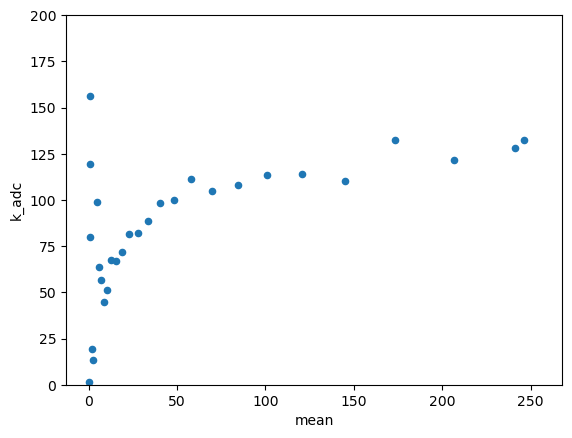

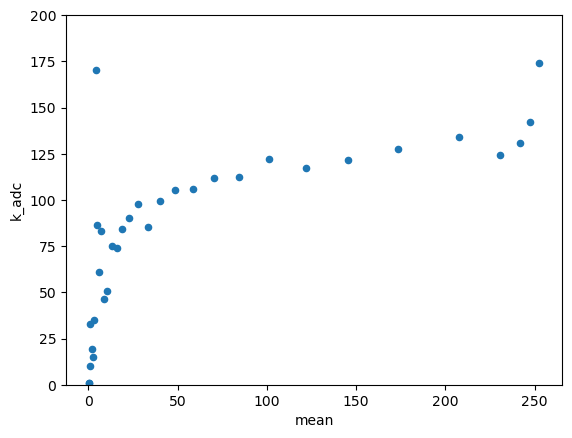

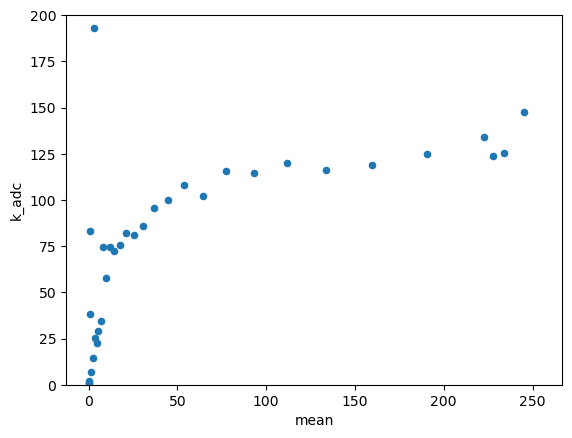

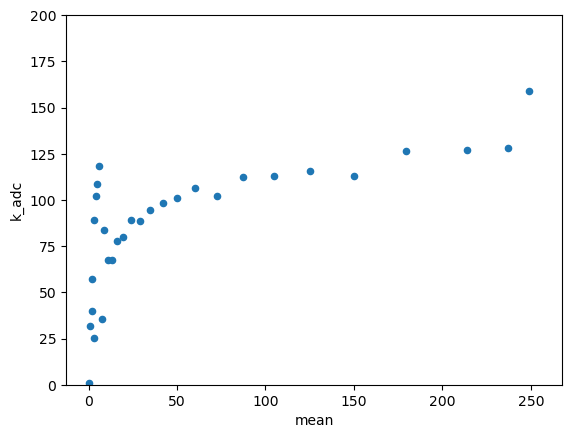

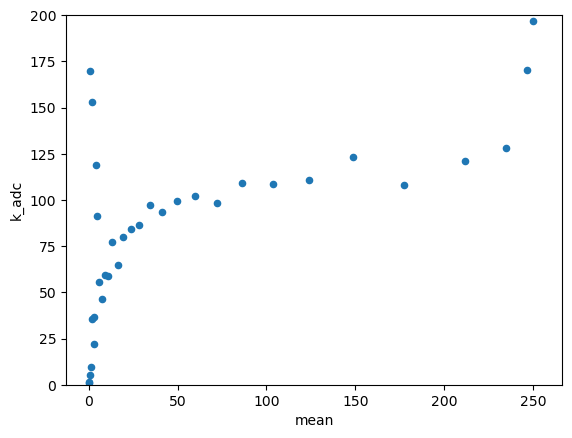

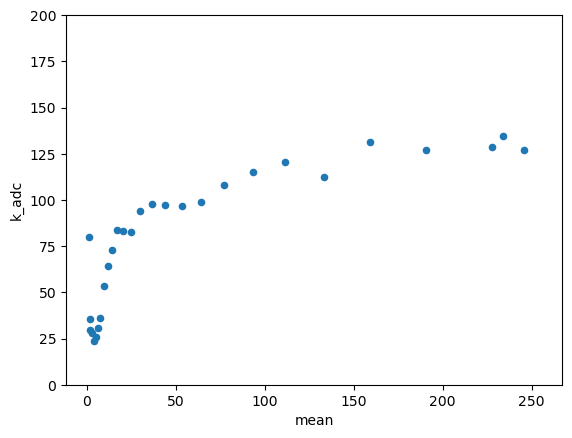

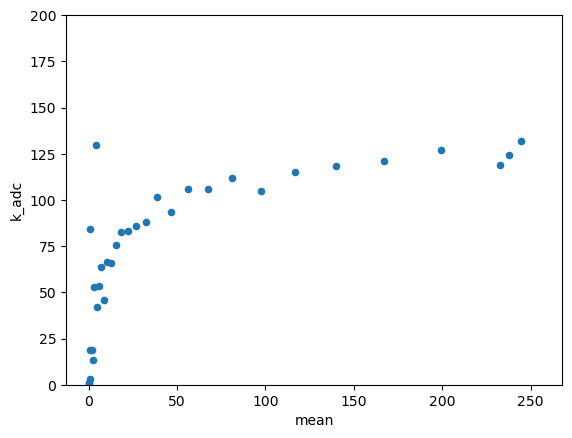

In [8]:
from pathlib import Path
import orochi_sim_proc as osp
# get list of channels
subject = 'SCT99'
channels = sorted(list(Path('..', 'data', subject).glob('[!.]*')))

for channel_path in channels:
    channel = channel_path.name
    # load the calibration target images
    pct_data = osp.load_pct_frames(subject, channel)
    pct_data.sort_values('exposure', inplace=True)
    # pct_data.plot.scatter('exposure', 'mean')
    # pct_data.plot('mean', ['std_t', 'std_rs'],logx=True, logy=True)    
    # pct_data.plot.scatter('mean', 'std_t')
    # pct_data.plot.scatter('mean','std_rs')    
    # pct_data.plot.scatter('mean','snr_rs', ylim=(0, 200))         
    pct_data.plot.scatter('mean','k_adc', ylim=(0, 200))    
    # compute gain

    # compute read noise
    # compute full well